In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
pcos = pd.read_csv('PCOS.csv')

In [6]:
pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [7]:
pcos.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [8]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [9]:
pcos.shape

(541, 45)

In [10]:
pcos.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [11]:
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors = "coerce")

In [12]:
pcos["II    beta-HCG(mIU/mL)"].dtype

dtype('float64')

In [13]:
pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors = "coerce")

In [14]:
pcos["AMH(ng/mL)"].dtype

dtype('float64')

In [15]:
pcos["II    beta-HCG(mIU/mL)"].fillna(pcos["II    beta-HCG(mIU/mL)"].median(), inplace=True)
pcos["AMH(ng/mL)"].fillna(pcos["AMH(ng/mL)"].median(),inplace = True)

In [16]:
pcos["Marraige Status (Yrs)"].fillna(pcos["Marraige Status (Yrs)"].median(), inplace=True)
pcos["Fast food (Y/N)"].fillna(pcos["Fast food (Y/N)"].median(),inplace = True)

In [17]:
pcos.drop("Unnamed: 44", axis=1, inplace=True)

In [18]:
pcos.duplicated().keep=False

In [19]:
pcos.duplicated().sum()

0

In [20]:
pcos.drop(["Sl. No","Patient File No."],axis=1,inplace=True)

In [21]:
pcos.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [22]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

Now, we can see that our data is pretty much cleared


In [23]:
pcos.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [24]:
pcos['Blood Group'].unique()

array([15, 11, 13, 17, 16, 12, 14, 18], dtype=int64)

In [25]:
cat_col=list(pcos.columns[pcos.nunique()==2])

In [26]:
cat_col.append('Blood Group')

In [27]:
print(cat_col)

['PCOS (Y/N)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Blood Group']


In [28]:
num_col = [x for x in list(pcos.columns) if x not in cat_col]

In [29]:
print(num_col)

[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


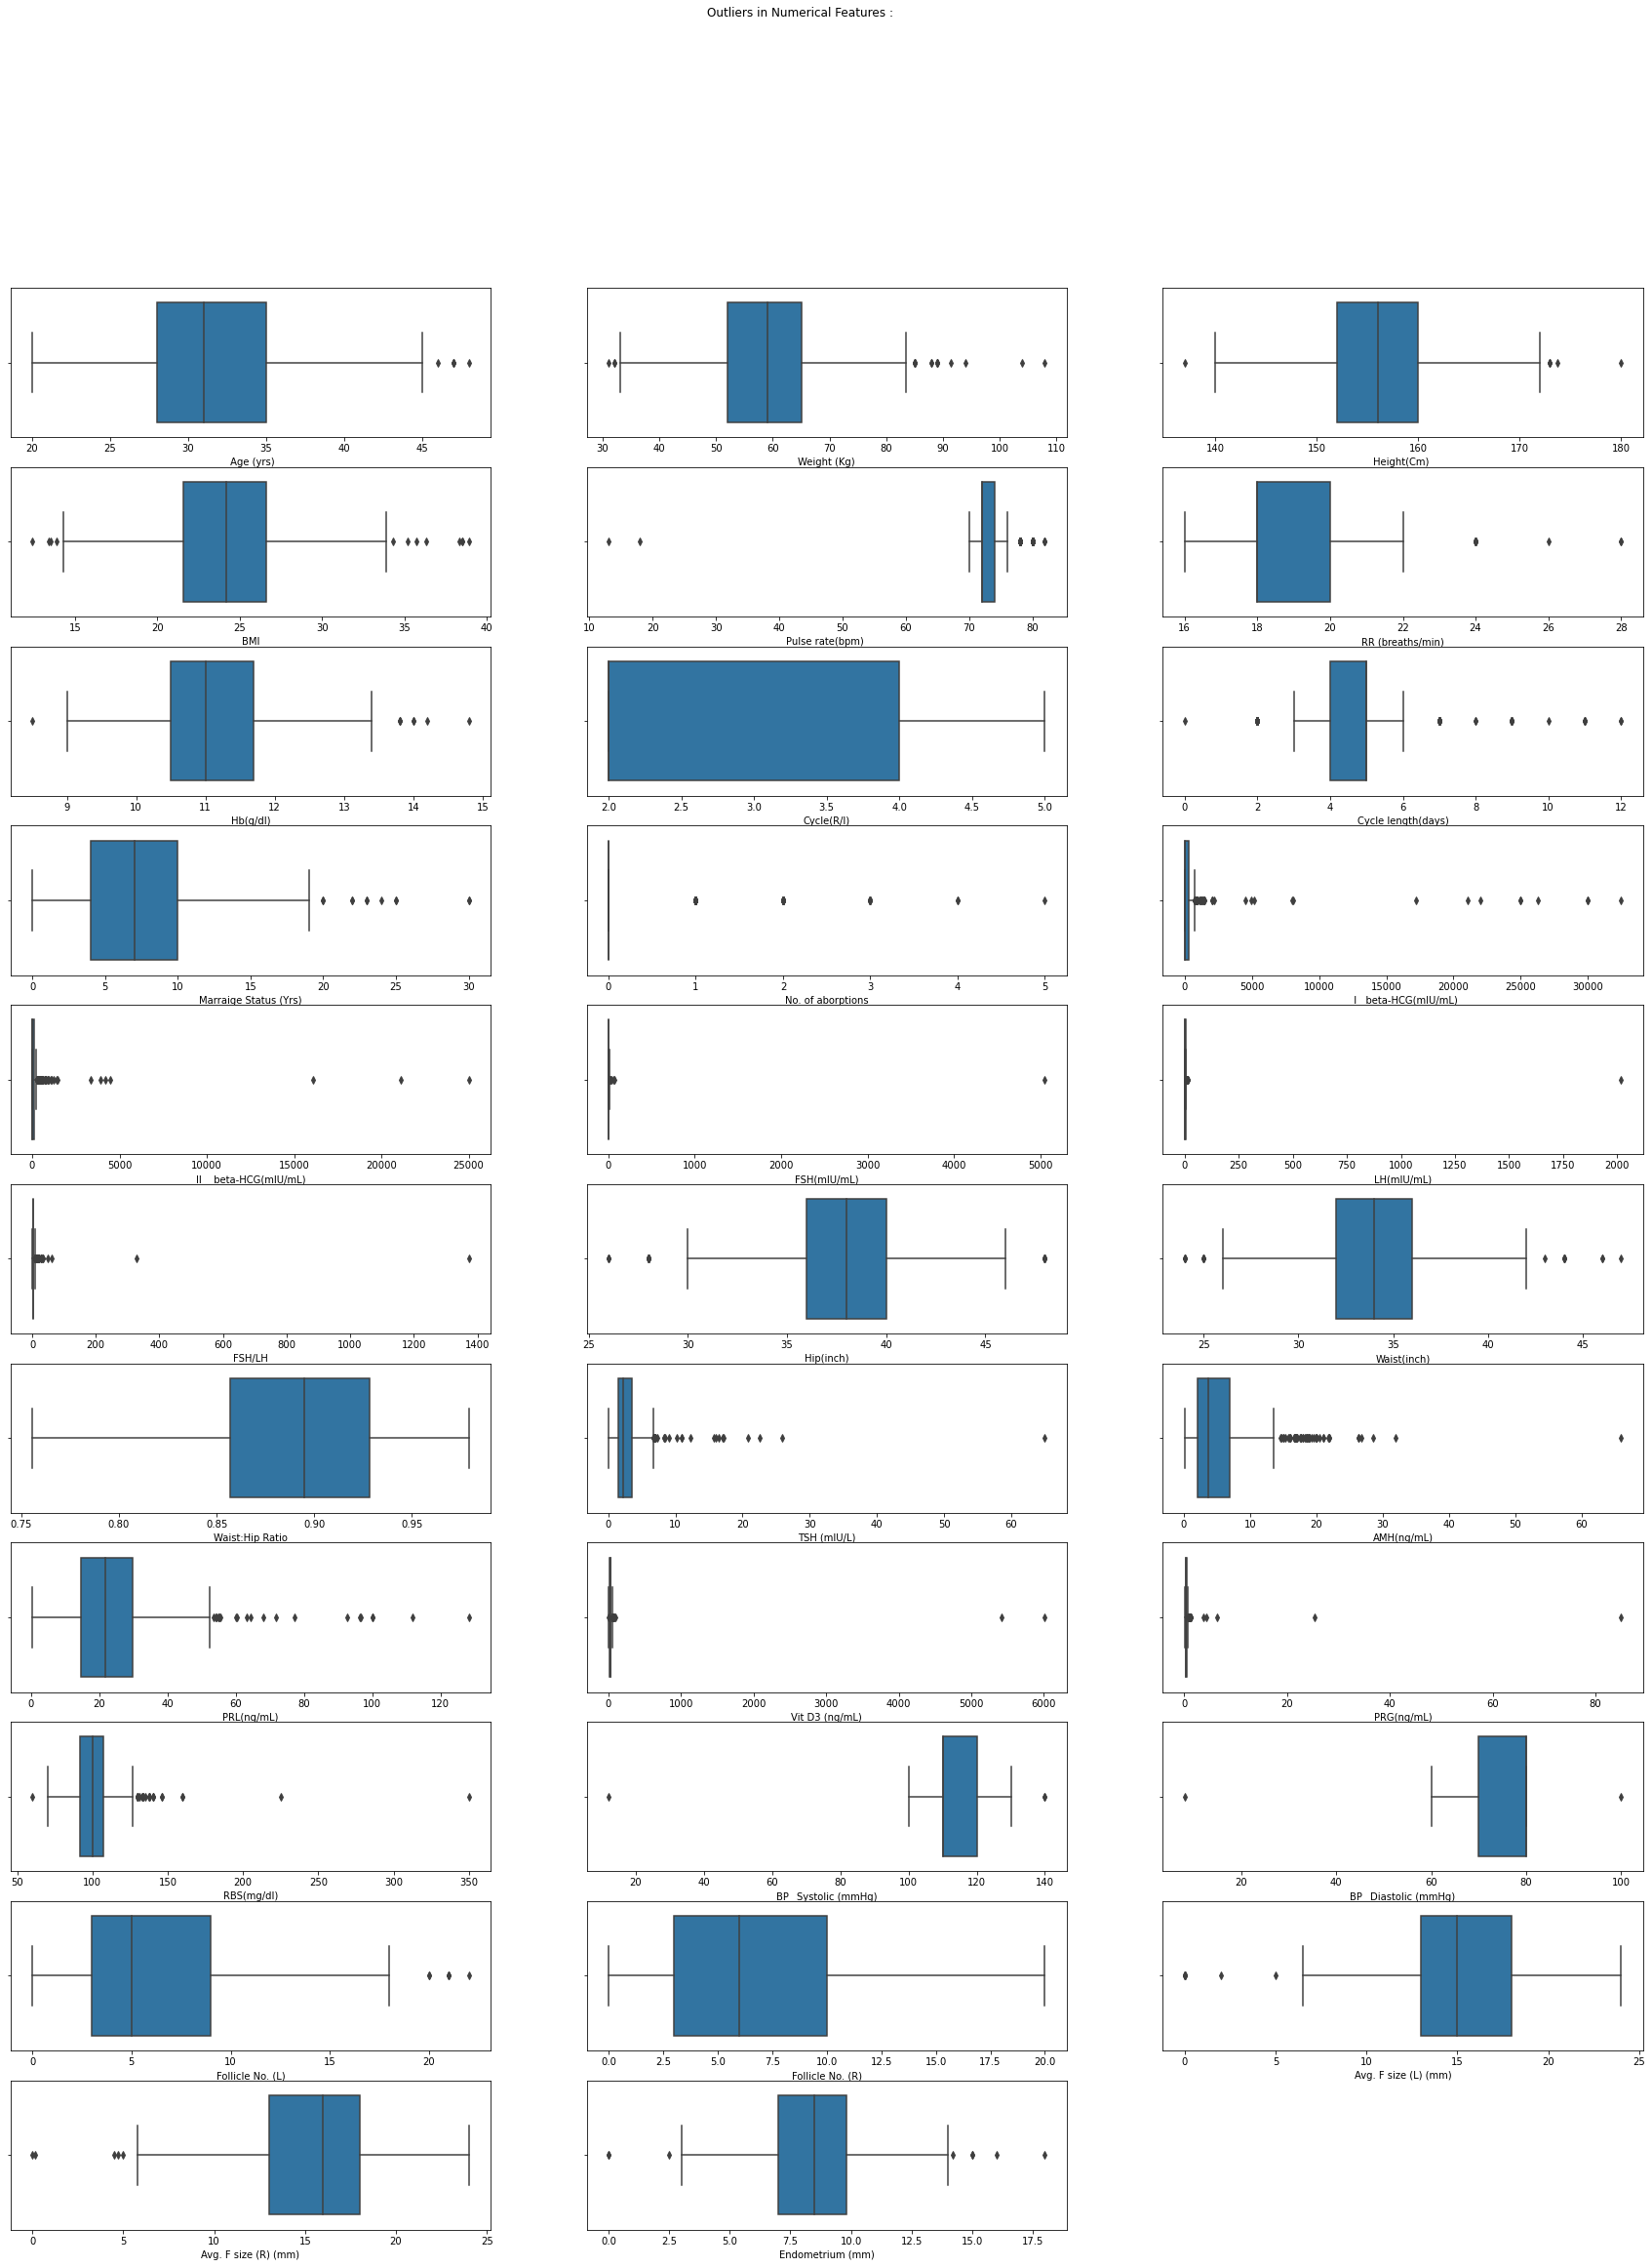

In [30]:
#checking for outliers
plt.figure(figsize=[30,40])
plt.suptitle("Outliers in Numerical Features :")
for i in range(0,len(num_col)):
  plt.subplot(12,3,i+1)
  sns.boxplot(x=pcos[num_col[i]])

In [31]:
"""columns = pcos.iloc[:]
# Iterate over each column and remove outliers
for column in columns:
    # Calculate the IQR-based thresholds for outlier removal
    q1, q3 = pcos[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    max_threshold = q3 + 1.5 * iqr
    min_threshold = q1 - 1.5 * iqr

    # Filter the data
    df = columns[(columns[column] > min_threshold) & (columns[column] < max_threshold)]"""

'columns = pcos.iloc[:]\n# Iterate over each column and remove outliers\nfor column in columns:\n    # Calculate the IQR-based thresholds for outlier removal\n    q1, q3 = pcos[column].quantile([0.25, 0.75])\n    iqr = q3 - q1\n    max_threshold = q3 + 1.5 * iqr\n    min_threshold = q1 - 1.5 * iqr\n\n    # Filter the data\n    df = columns[(columns[column] > min_threshold) & (columns[column] < max_threshold)]'

The above code is for removing outliers in columns.
However, in health data may be the outliers are the data of patients with PCOS positive
So, removing outliers in this dataset may lead an inaccurate prediction

In [32]:
pcos["PCOS (Y/N)"].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

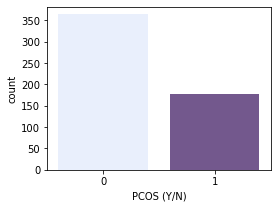

In [33]:
colour1 = ["#e6eeff", "#734f96"]
fig, ax = plt.subplots(figsize=(4,3))
pcos_count = sns.countplot(x= pcos["PCOS (Y/N)"], palette=colour1)

Dataset is imbalanced

In [34]:
pie = pcos["PCOS (Y/N)"].value_counts(normalize=True)
pie

0    0.672828
1    0.327172
Name: PCOS (Y/N), dtype: float64

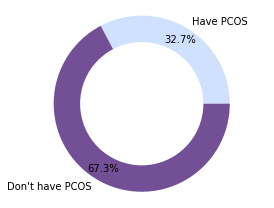

In [35]:
fig, ax = plt.subplots(figsize=(4,3))
labels = "Have PCOS", "Don't have PCOS"
sizes = [177, 364]
ax.pie(sizes, labels = labels, autopct="%1.1f%%", colors=["#d0e1ff", "#734f96"], pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis("equal")
plt.tight_layout()
plt.show()

In [36]:
corr_pcos = pcos.corr()
corr_pcos

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.168513,0.211938,0.068254,0.199697,0.036433,0.091821,0.036928,0.087170,0.401644,...,0.286077,0.376183,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.021372,-0.010954,0.045831,0.087382,-0.021558,-0.085943,...,-0.032921,-0.039108,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.901688,0.072682,0.019983,0.043614,0.009594,0.200758,...,0.063983,0.160774,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006845,0.040825,-0.074339,-0.029459,0.024378,-0.017336,...,0.061129,0.032839,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,0.199697,0.021372,0.901688,-0.006845,1.000000,0.061328,0.050507,0.061579,0.003832,0.232703,...,0.045535,0.157744,-0.080660,0.069737,0.140062,0.143110,0.104425,-0.011736,-0.111427,0.009327
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.061328,1.000000,0.047572,-0.023766,-0.001759,0.123724,...,0.039029,-0.035836,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050507,0.047572,1.000000,0.303804,-0.052048,0.101006,...,-0.003039,0.059242,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.061579,-0.023766,0.303804,1.000000,-0.040487,0.018324,...,0.029242,0.137957,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003832,-0.001759,-0.052048,-0.040487,1.000000,0.036683,...,0.053794,0.074818,0.011643,0.053020,0.000606,0.061195,0.072958,0.032617,0.024335,-0.066446
Cycle(R/I),0.401644,-0.085943,0.200758,-0.017336,0.232703,0.123724,0.101006,0.018324,0.036683,1.000000,...,0.121380,0.208263,-0.004989,0.054910,0.081345,0.296518,0.251575,0.033450,0.016007,0.043614


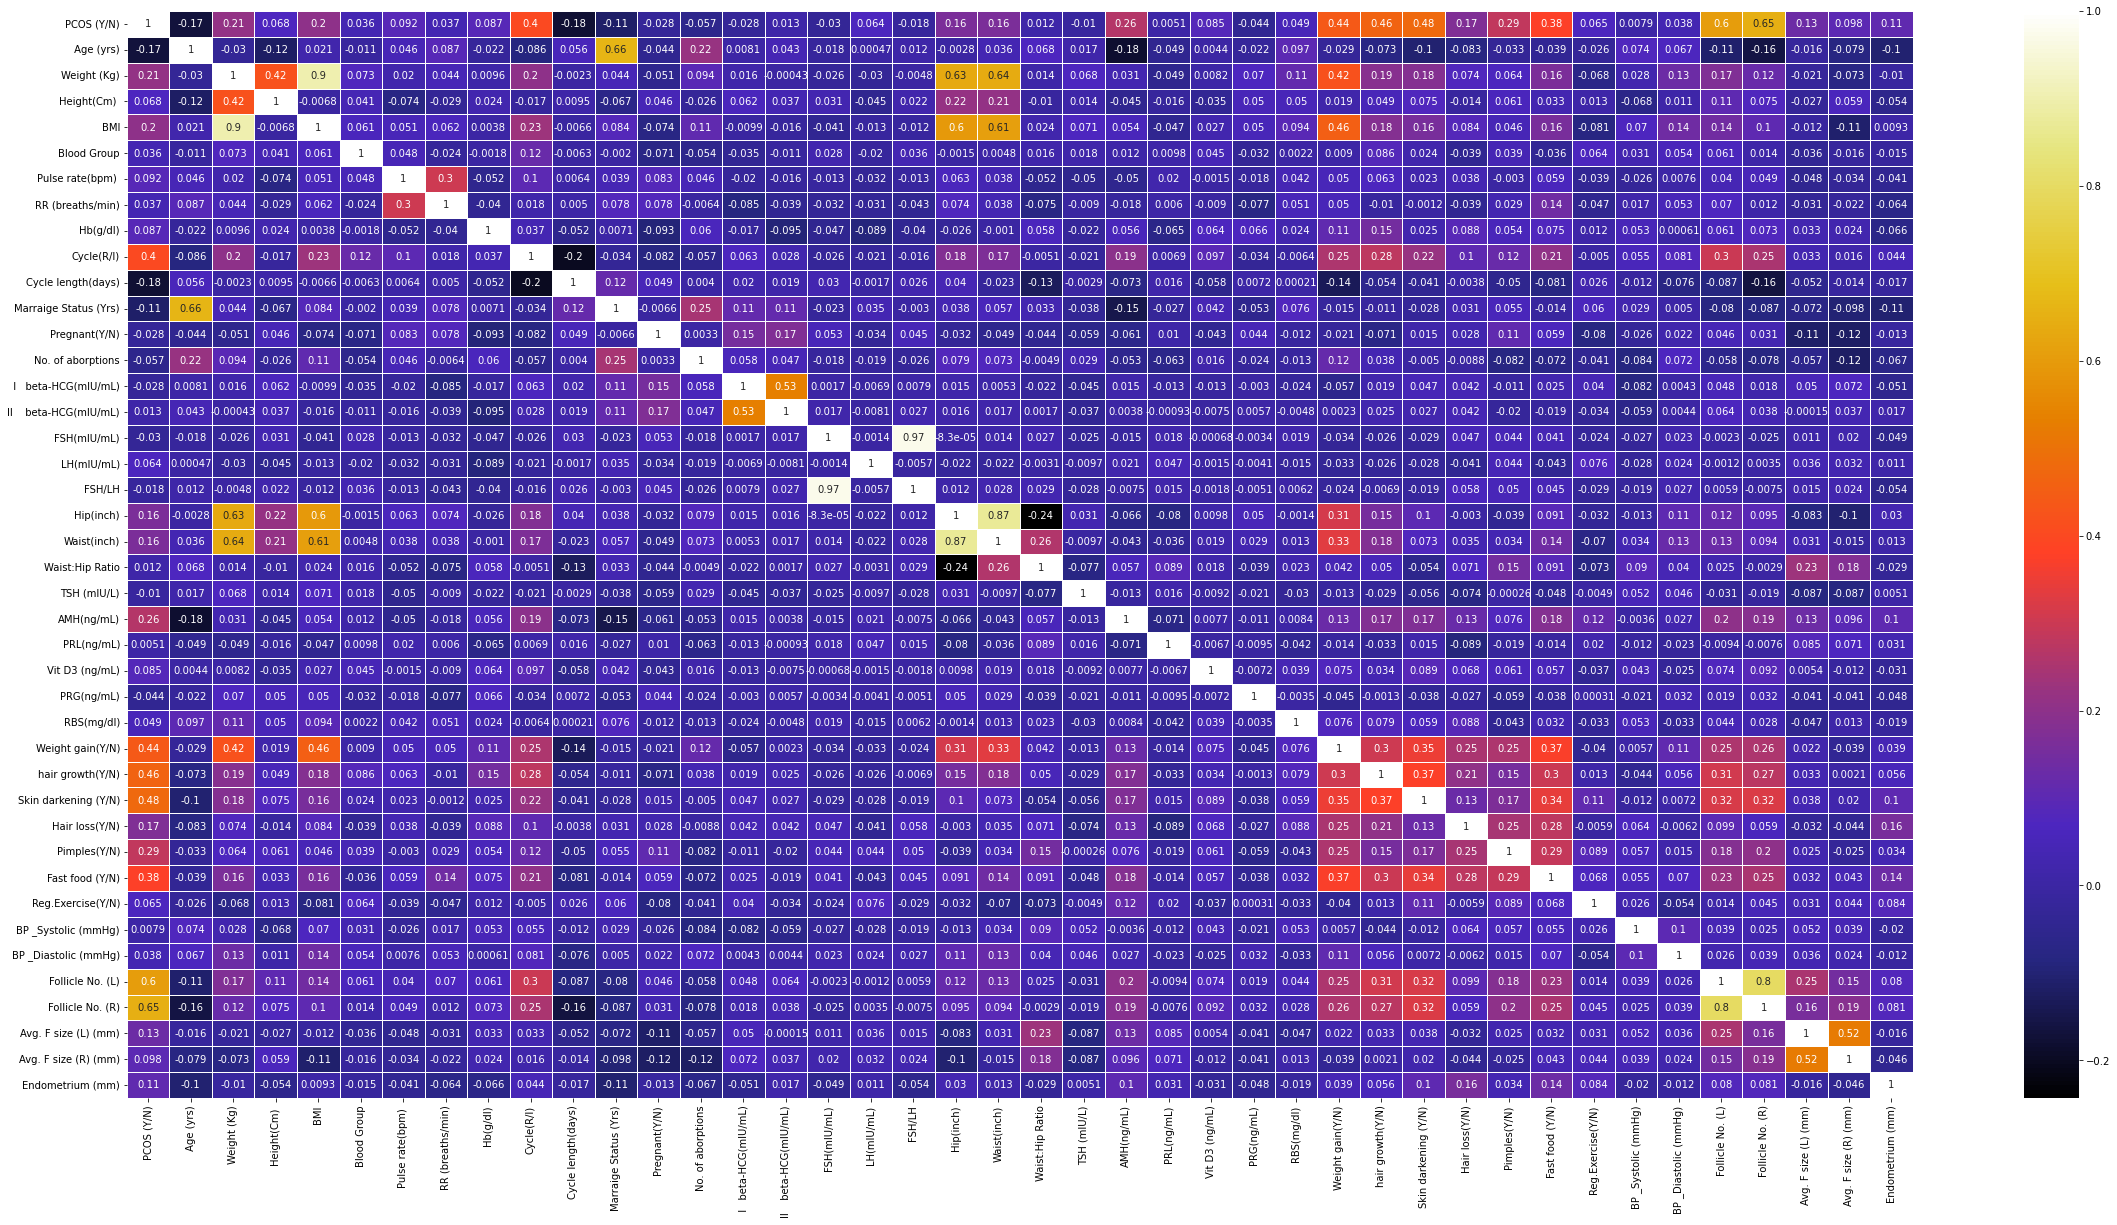

In [37]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(corr_pcos,cmap="CMRmap", annot=True,linewidths=.5,ax=ax)
plt.show()

In [38]:
corr_pcos["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

In [39]:
#feature selection
high_corr_features=corr_pcos["PCOS (Y/N)"].sort_values(ascending=False).head(17)
high_corr_features

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Weight (Kg)             0.211938
BMI                     0.199697
Hair loss(Y/N)          0.172879
Waist(inch)             0.164598
Hip(inch)               0.162297
Avg. F size (L) (mm)    0.132992
Endometrium (mm)        0.106648
Name: PCOS (Y/N), dtype: float64

In [40]:
pcos["Cycle(R/I)"].unique()

array([2, 4, 5], dtype=int64)

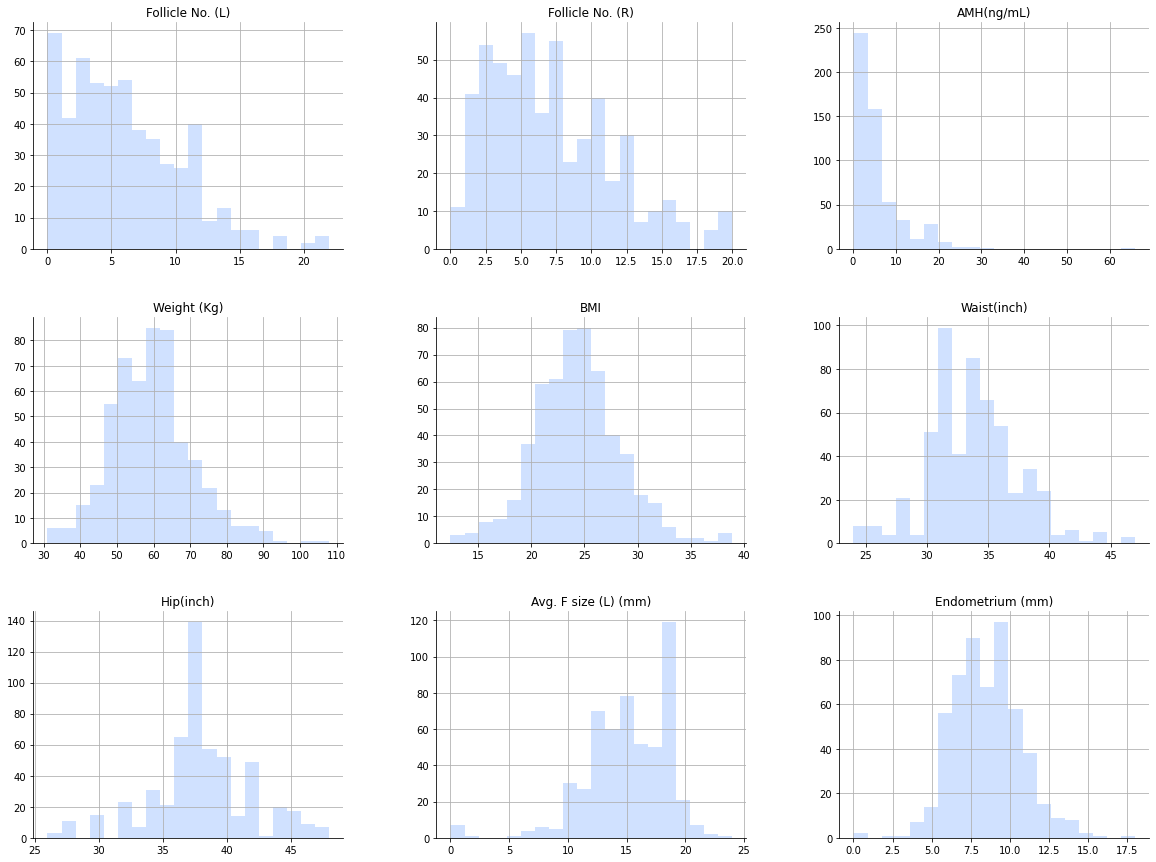

In [41]:
histo_num =pcos.hist(column=["Follicle No. (L)", "Follicle No. (R)", "AMH(ng/mL)", "Weight (Kg)", "BMI", "Waist(inch)", "Hip(inch)", "Avg. F size (L) (mm)", "Endometrium (mm)"], bins=20, figsize=(20, 15), color = "#d0e1ff")
sns.despine()

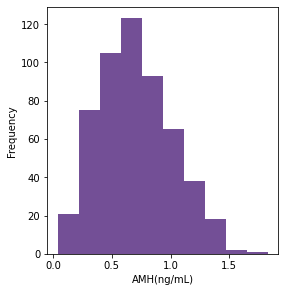

In [42]:
log_var = ["AMH(ng/mL)"]

fig = plt.figure(figsize = (24, 10))

for j in range (len (log_var)):
    var = log_var[j]
    transformed = "log_" + var
    pcos[transformed] = np.log10(pcos [var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    sub.set_xlabel (var)
    log_histo = pcos[transformed].plot(kind = 'hist', color = "#734f96")

In [43]:
average_values = pcos.groupby('PCOS (Y/N)').mean()
print(average_values)

             Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
PCOS (Y/N)                                                                 
0            32.065934    58.008791   156.197934  23.743407    13.755495   
1            30.124294    62.985876   157.074847  25.467797    13.898305   

            Pulse rate(bpm)   RR (breaths/min)   Hb(g/dl)  Cycle(R/I)  \
PCOS (Y/N)                                                              
0                  72.964286         19.200549  11.107390    2.307692   
1                  73.830508         19.333333  11.268305    3.079096   

            Cycle length(days)  ...  Fast food (Y/N)  Reg.Exercise(Y/N)  \
PCOS (Y/N)                      ...                                       
0                     5.126374  ...         0.384615           0.228022   
1                     4.559322  ...         0.785311           0.288136   

            BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
PCOS (Y/N)                

Model Building

In [44]:
x = pcos[["Follicle No. (R)", "Follicle No. (L)", "Skin darkening (Y/N)",
               "hair growth(Y/N)", "Weight gain(Y/N)", "Cycle(R/I)", "Fast food (Y/N)", "Pimples(Y/N)", "log_AMH(ng/mL)", "Weight (Kg)", "BMI",
               "Hair loss(Y/N)", "Waist(inch)", "Hip(inch)", "Avg. F size (L) (mm)", "Endometrium (mm)"]].values
y = pcos.iloc[:, 0].values

In [45]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy="minority")
x, y = oversample.fit_resample(x, y)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)
print(x_train)
np.save('X_train.npy', x_train)

[[ 8.   5.   1.  ... 28.  18.   7. ]
 [ 5.   3.   0.  ... 39.  18.   6. ]
 [ 7.   4.   1.  ... 40.  10.   9.2]
 ...
 [10.   8.   1.  ... 38.  17.   9. ]
 [ 7.  10.   0.  ... 40.  10.   8.7]
 [ 6.   4.   0.  ... 38.  18.   7.3]]


In [47]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

Logistic Regression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred_log = log_reg.predict(x_test)
y_pred_log
y_predt=log_reg.predict(x_train)

In [50]:
result = {"Actual":y_train, "Predicted": y_predt}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
577,0,0
578,0,1
579,0,1
580,0,0


In [51]:
result = {"Actual":y_test, "Predicted": y_pred_log}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
141,0,0
142,0,0
143,1,1
144,0,0


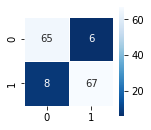


Accuracy :  0.9041095890410958

Precision :  0.9178082191780822

Recall :  0.8933333333333333

F1 score :  0.9054054054054055


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_log))
print("\nPrecision : ",precision_score(y_test,y_pred_log))
print("\nRecall : ",recall_score(y_test,y_pred_log))
print("\nF1 score : ",f1_score(y_test,y_pred_log))

In [53]:
accuracy_LR= metrics.accuracy_score(y_test, y_pred_log)

Gaussian Naive Bayes

In [54]:
gaussian_model = GaussianNB()
gaussian_model.fit(x_train,y_train)

GaussianNB()

In [55]:
y_pred_nb = gaussian_model.predict(x_test)

In [56]:
result = {"Actual":y_test, "Predicted": y_pred_nb}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
141,0,0
142,0,0
143,1,1
144,0,0


In [57]:
accuracy_NB= metrics.accuracy_score(y_test, y_pred_nb)

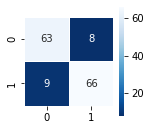


Accuracy :  0.8835616438356164

Precision :  0.8918918918918919

Recall :  0.88

F1 score :  0.8859060402684563


In [58]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_nb))
print("\nPrecision : ",precision_score(y_test,y_pred_nb))
print("\nRecall : ",recall_score(y_test,y_pred_nb))
print("\nF1 score : ",f1_score(y_test,y_pred_nb))

K-Nearest Neighbors

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [60]:
y_pred_knn = knn_model.predict(x_test)

In [61]:
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)

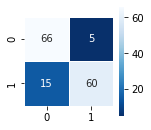


Accuracy :  0.863013698630137

Precision :  0.9230769230769231

Recall :  0.8

F1 score :  0.8571428571428571


In [62]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_knn))
print("\nPrecision : ",precision_score(y_test,y_pred_knn))
print("\nRecall : ",recall_score(y_test,y_pred_knn))
print("\nF1 score : ",f1_score(y_test,y_pred_knn))

Decision Tree

In [63]:
decisiontree_gini = DecisionTreeClassifier()
decisiontree_depth = DecisionTreeClassifier(max_depth=4)
decisiontree_entropy =DecisionTreeClassifier(criterion='entropy')

In [64]:
decisiontree_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
decisiontree_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [66]:
decisiontree_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [67]:
y_pred_gini = decisiontree_gini.predict(x_test)

In [68]:
y_pred_entropy = decisiontree_entropy.predict(x_test)

In [69]:
y_pred_depth = decisiontree_depth.predict(x_test)

In [70]:
print('Accuracy (gini):', metrics.accuracy_score(y_test, y_pred_gini))
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print('Accuracy (enthropy):', metrics.accuracy_score(y_test, y_pred_entropy))
accuracy_entropy = metrics.accuracy_score(y_test, y_pred_entropy)
print('Accuracy (maxdepth):', metrics.accuracy_score(y_test, y_pred_depth))
accuracy_depth = metrics.accuracy_score(y_test, y_pred_depth)

Accuracy (gini): 0.9041095890410958
Accuracy (enthropy): 0.910958904109589
Accuracy (maxdepth): 0.8356164383561644


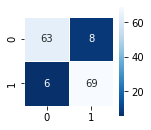


Accuracy :  0.9041095890410958

Precision :  0.8961038961038961

Recall :  0.92

F1 score :  0.9078947368421053


In [71]:
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_gini))
print("\nPrecision : ",precision_score(y_test,y_pred_gini))
print("\nRecall : ",recall_score(y_test,y_pred_gini))
print("\nF1 score : ",f1_score(y_test,y_pred_gini))

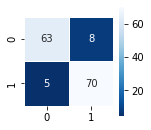


Accuracy :  0.910958904109589

Precision :  0.8974358974358975

Recall :  0.9333333333333333

F1 score :  0.9150326797385621


In [72]:
cm = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_entropy))
print("\nPrecision : ",precision_score(y_test,y_pred_entropy))
print("\nRecall : ",recall_score(y_test,y_pred_entropy))
print("\nF1 score : ",f1_score(y_test,y_pred_entropy))

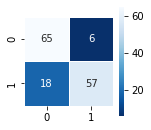


Accuracy :  0.8356164383561644

Precision :  0.9047619047619048

Recall :  0.76

F1 score :  0.8260869565217391


In [73]:
cm = confusion_matrix(y_test, y_pred_depth)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_depth))
print("\nPrecision : ",precision_score(y_test,y_pred_depth))
print("\nRecall : ",recall_score(y_test,y_pred_depth))
print("\nF1 score : ",f1_score(y_test,y_pred_depth))

Random Forest Classifier

In [74]:
ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
y_pred_ran = ran_for.predict(x_test)

In [76]:
result = {"Actual":y_test, "Predicted": y_pred_ran}
result_df = pd.DataFrame(result)
result_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
141,0,0
142,0,0
143,1,1
144,0,0


In [77]:
accuracy_RF = metrics.accuracy_score(y_test, y_pred_ran)
accuracy_RF

0.9726027397260274

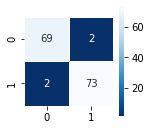


Accuracy :  0.9726027397260274

Precision :  0.9733333333333334

Recall :  0.9733333333333334

F1 score :  0.9733333333333334


In [78]:
cm = confusion_matrix(y_test, y_pred_ran)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_ran))
print("\nPrecision : ",precision_score(y_test,y_pred_ran))
print("\nRecall : ",recall_score(y_test,y_pred_ran))
print("\nF1 score : ",f1_score(y_test,y_pred_ran))

SVM

In [79]:
## create an object for svm
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

In [80]:
clfLinear.fit(x_train, y_train)
clfsigmoid.fit(x_train, y_train)
clfrbf.fit(x_train, y_train)

SVC()

In [81]:
## make prediction
y_pred_linear = clfLinear.predict(x_test)
y_pred_sigmoid = clfsigmoid.predict(x_test)
y_pred_rbf = clfrbf.predict(x_test)

In [82]:
new_x = np.array([[15.0, 15.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 7.94, 74.0, 32.0, 1.0, 40.0, 45.0, 20.0, 8.0]])
new_x = scaler_x.transform(new_x)  # Standardize the new data using the same scaler
new_prediction = log_reg.predict(new_x)
new_prediction

array([1], dtype=int64)

In [83]:
new_x = np.array([[3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 2.07, 44.6, 19.3, 0.0, 30.0, 36.0, 18.0, 8.5]])
new_x = scaler_x.transform(new_x)  # Standardize the new data using the same scaler
new_prediction = log_reg.predict(new_x)
new_prediction

array([0], dtype=int64)

In [84]:
print('Accuracy (linear):', metrics.accuracy_score(y_test, y_pred_linear))
accuracy_linear = metrics.accuracy_score(y_test, y_pred_linear)
print('Accuracy (sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
accuracy_sigmoid = metrics.accuracy_score(y_test, y_pred_sigmoid)
print('Accuracy (rbf):', metrics.accuracy_score(y_test, y_pred_rbf))
accuracy_rbf = metrics.accuracy_score(y_test, y_pred_rbf)

Accuracy (linear): 0.8904109589041096
Accuracy (sigmoid): 0.8356164383561644
Accuracy (rbf): 0.9246575342465754


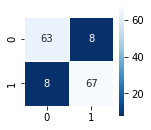


Accuracy :  0.8904109589041096

Precision :  0.8933333333333333

Recall :  0.8933333333333333

F1 score :  0.8933333333333333


In [85]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_linear))
print("\nPrecision : ",precision_score(y_test,y_pred_linear))
print("\nRecall : ",recall_score(y_test,y_pred_linear))
print("\nF1 score : ",f1_score(y_test,y_pred_linear))

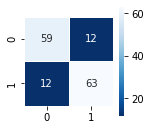


Accuracy :  0.8356164383561644

Precision :  0.84

Recall :  0.84

F1 score :  0.8399999999999999


In [86]:
cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_sigmoid))
print("\nPrecision : ",precision_score(y_test,y_pred_sigmoid))
print("\nRecall : ",recall_score(y_test,y_pred_sigmoid))
print("\nF1 score : ",f1_score(y_test,y_pred_sigmoid))

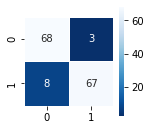


Accuracy :  0.9246575342465754

Precision :  0.9571428571428572

Recall :  0.8933333333333333

F1 score :  0.9241379310344828


In [87]:
cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cmap = 'Blues_r')
plt.show()
print("\nAccuracy : ",accuracy_score(y_test,y_pred_rbf))
print("\nPrecision : ",precision_score(y_test,y_pred_rbf))
print("\nRecall : ",recall_score(y_test,y_pred_rbf))
print("\nF1 score : ",f1_score(y_test,y_pred_rbf))

In [88]:
eval_data = {"Model": ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbours", "Decision Tree (gini)", "Decision Tree (entropy)", "Decision Tree (max depth)", "SVM (linear)", "SVM (sigmoid)", "SVM (rbf)", "Random Forest"],
        "Accuracy": [accuracy_LR, accuracy_NB, accuracy_knn, accuracy_gini, accuracy_entropy, accuracy_depth, accuracy_linear, accuracy_sigmoid, accuracy_rbf, accuracy_RF]}
eval = pd.DataFrame(data=eval_data)
eval.round(2)


,Model,Accuracy
0,Logistic Regression,0.90
1,Naive Bayes,0.88
2,K-Nearest Neighbours,0.86
3,Decision Tree (gini),0.90
4,Decision Tree (entropy),0.91
5,Decision Tree (max depth),0.84
6,SVM (linear),0.89
7,SVM (sigmoid),0.84
8,SVM (rbf),0.92
9,Random Forest,0.97


In [89]:
import pickle
with open("pcos_predictrf.pkl", "wb") as file:
    pickle.dump(ran_for, file)

In [90]:
import os
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: C:\Users\Vironikka Jenifer J


In [105]:
import joblib
with open('rf.pkl', 'wb') as file:
    joblib.dump(ran_for,file)

In [ ]:
with open('rf.pkl', 'wb') as file:
    joblib.dump(ran_for,file)